In [59]:
import numpy as np
import matplotlib.pyplot as plt
import time

class KMeans:
    def __init__(self, k, n_iter=5, tol=1e-5):
        self.k = k
        self.n_iter = n_iter
        self.tol = tol
    
    def cost(self, data):
        start = time.time()
        tmp = np.linalg.norm(data - self.means[self.nums], axis=1).sum() / len(data)
        print('It took {0:0.4f} seconds'.format(time.time() - start))
        return tmp
                
    def fit(self, data):
        """
        :param data: numpy array of shape (k, ..., dims)
        """
        data = data.reshape(-1, data.shape[-1])
        self.loss = np.inf
        self.loss_hist = []
        self._initialize_means(data)
        self._initialize_nums(data)
        for _ in range(self.n_iter):
            start = time.time()
            prev_nums = self.nums.copy()
            prev_means = self.means.copy()
            self.dim = data.shape[-1]
            self._initialize_means(data)
            self._initialize_nums(data)            
            prev_loss = np.inf
            loss_hist = []
            while True:                                             
                if (prev_loss - self.cost(data)) > self.tol:
                    prev_loss = self.cost(data)
                    self.update_PointClasses(data)
                    self.update_means(data)
                    loss_hist.append(self.cost(data))
                    min_loss = min(loss_hist)            
                else:
                    break
            self.loss_hist.append(min_loss)
            if (self.loss <= min_loss):                                                
                self.nums = prev_nums
                self.means = prev_means
            else:
                self.loss = min_loss
#             print('It took {0:0.4f} seconds'.format(time.time() - start))

    def update_PointClasses(self, data):
        start = time.time()
        nums = []       
        for mean in self.means:
            nums.append(np.linalg.norm(data-mean, axis=1))            
        self.nums = np.argmin(np.array(nums).T, axis=1)        
#         print('It took {0:0.4f} seconds'.format(time.time() - start))
        
    def update_means(self, data):
        start = time.time()          
        means = []
        self.prevmeans = self.means        
        for i in range(self.k):            
            means.append(np.mean(data[np.where(self.nums==i)], axis=0))
        self.means = np.array(means)
#         print('It took {0:0.4f} seconds'.format(time.time() - start))
    
    def _initialize_means(self, data):
        self.prevmeans = []
        self.means = data[np.random.randint(0, high=len(data), size=self.k)]
    
    def _initialize_nums(self, data):
        self.nums = np.random.randint(0, self.k, size=len(data))

    def predict(self, data):
        """
        :param data: numpy array of shape (k, ..., dims)
        :return: labels of each datapoint and it's mean
                 0 <= labels[i] <= k - 1
        """
        data = data.reshape(-1, data.shape[-1])
        nums = []
        for dp in data:
            distance = np.inf
            for num, mean in enumerate(self.means):
                tmp_d = np.linalg.norm(dp - mean)
                if tmp_d < distance:
                    dp_n = num
                    distance = tmp_d
            nums.append(dp_n)
            
        return np.array(nums), self.means[self.nums]  


class KMeansPlusPlus(KMeans):
    def _initialize_means(self, data):
        self.prevmeans=[]
        data_prob = []        
        i =0 
        means = []        
        means.append(data[np.random.randint(0, len(data), size=1)][0])
        while len(means) < self.k:
            for dp in data:
                distances = []            
                for mean in means:
                    distances.append(np.linalg.norm(mean - dp))                    
                data_prob.append(min(distances))                
            data_prob = [x / sum(data_prob) for x in data_prob]
            means.append(data[np.random.choice(np.arange(len(data)), p=data_prob)])
            data_prob = []            
        self.means = np.array(means)


In [71]:
data=np.load("data.npy")
# plt.scatter(data[:,0], data[:,1])
a = KMeans(10, n_iter=10)
a.fit(data)
# a = KMeansPlusPlus(5)
# a.fit(data)

It took 0.0000 seconds
It took 0.0010 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0010 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0010 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0000 seconds
It took 0.0

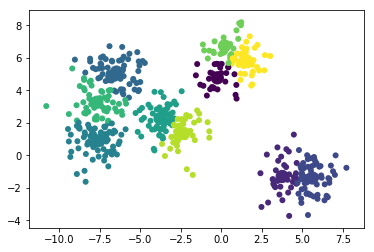

In [72]:
prediction, _ = a.predict(data)
plt.scatter(a.means[:,0], a.means[:,1], c=range(len(a.means)), s= 150)
plt.scatter(data[:,0],data[:,1], c = prediction, edgecolors='none')
plt.show()

In [1]:
".csv".replace("csv", "jpg")

'.jpg'